## Overview of the Project ##

- The dataset contains <b>1460 rows and 81 columns</b> and has data of houses sold during the period 2006-2010 in the city of Ames, IA.
- The dataset has 43 categorical and 38 numerical fields which we can use.
- 19 columns were identified as having NULL values, out of which 4 columns have more than 70 percent were NULL, which were dropped
* Executed a <b>Heat Map</b> to check for Variable Co-relation . We have minimal co-relation which is good
* Checked for outliers and acted on that data as appropriate. <b>Removed LotArea greater than 50,000 sq. ft</b>
* Created New Features for <b>Total Square Feet</b>.
- Adjusted the SalesPrice for Inflation using <b>CPI package </b>
- Created a <b>data pipeline for Numerical and Categorical Features </b>which did the following:
    - Simple Imputer to handle null values
    - Scalers to scale the data to better fit the model
    - Ran One Hot Encoding on categorical data
- Finally executed <b>Support Vector Regression, Ridge Regression and XG Boost Regressor</b> to train the Model using <b>GridSearchCV</b> to test multiple parameters.
- Identified <b> XG Boost Regressor </b> as the best performing model by comparing the results (RMSE) and persisted it to apply on test data.
- Downloaded the latest housing data sets for <b>Newark-DE, Wilmington-DE, Bear-DE and Ames-IA</b> using US Real Estate api from RapidApi (https://rapidapi.com/datascraper/api/us-real-estate/) and used the saved model to predict the house prices.
- A web app was developed using Streamlit and deployed to Heroku which can be accessed using:
    - https://housing-demo-team6.herokuapp.com/


### Summary of the best scores (RMSE) and model selection
- Following are the scores (RMSE) from Support Vector Regression, Ridge and XG Boost Regressor
    - best Support Vector regression score (RMSE) is:  -100085.7038582825
    - best Ridge regression score (RMSE) is:  -49146.2619536027
    - best XGBoost score (RMSE) is:  -44868.30845180691

- Based on the above Scores, we selected XG Boost Regressor as our desired model.

### RMSE for XG Boost Regressor
- Train RMSE of XG Boost Regressor is 44868.30845180691
- Test RMSE of our best estimator, which is XGBoost Regressor, is 35280.55625966848.
- In this case, **RMSE in test dataset was observed lower than in train dataset**

#### Test Data RMSE

- Below table lists down the performance metrics and baseline SalesPrice for each of the cities

![Permformance Data](Data/perfDataSnapshot.JPG)

### Conclusion
- We have lower RMSE on housingData (train/test split).
- The model RMSE on the 4 selected cities (Wilmington-DE, Bear-DE, Newark-DE, Ames-IA), was very high.
- Hence, we can conclude that training data cannot be directly used to predict house prices of different geographical locations.

---------------------------------------------------------------------------------------------------
### Initial Data Analysis
- The dataset contains 1460 rows and 81 columns and has data of houses sold during the period 2006-2010 in the city of Ames, IA.
- The dataset has 43 categorical and 38 numerical fields which we can use.
- Executed Describe, info() to find the type of data and 19 columns were identified as having NULL values
- Out of 19, 4 columns have more than 70 percent NULLs
- Garage car size, Year Built and Total Square Feet have high correlation with Sales Price.
- In the train data, the oldest house was built in 1872 and newest house in 2010.

### Inflation Adjustment
- Installed and imported the cpi package (https://www.bls.gov/) 
- Used Year sold and the current Price to get the Adjusted SalesPrice.


### Data Cleansing
- Out of 19 which had nulls, 4 columns having more than 70 percent NULLs were dropped
- Ran box plot for finding outliers and LotArea greater than 50,000 sq.ft. were eliminated

### Data Correlation
- Plotted histogram for the columns: LotArea,BldgType,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GarageCars
- Relationships of columns with SalesPrice
    - Smaller increase in LotArea increased SalesPrice by a higher margin
    - Living Area was linearly related to the SalesPrice.
    - Total of Basement, 1st and 2nd floor square footage was highly correlated to SalesPrice.

### Imputers
- SimpleImputer was used to handle the incoming null values.

### Feature Engineering
- Added Total Square Feet as a new feature, which is total of Basement, 1st and 2nd floor square feet.
- Final Features used were
    - LotArea
    - BldgType
    - YearBuilt
    - FullBath
    - HalfBath
    - BedroomAbvGr
    - GarageCars
    - Total Square Feet
- These features were common among the datasets from different cities and were also highly correlated to the SalesPrice.

### Data Pre-processing pipeline
- Following steps were added in the data pipeline
    - Missing data: used SimpleImputer()
    - Feature scaling : used StandardScaler()
    - Categorical feature encoding: used Onehot Encoder
    - Transformation: used ColumnTransformer() to transform the numerical and categorical features

### Model Training, Tuning & Evaluation
- Support Vector Regressor, Ridge regressor and XGBoost Regressor were trained with different parameters and below are the best parameter selection for each.
- Support Vector regression:
    - {'clf_svr__kernel': 'linear'}
- Ridge regressor:
    - {'clf_RG__alpha': 0.2, 'clf_RG__copy_X': True, 'clf_RG__fit_intercept': False}
- XGBoost regressor:
    - {'clf_XG__learning_rate': 0.1, 'clf_XG__max_depth': 5, 'clf_XG__n_estimators': 100}
- Checked the important features during tuning and removed the least important feature 'HouseStyle' from the dataset which increased our score.


### Final Selection of Model
- Following are the scores from Support Vector Regression, Ridge and XG Boost Regressor
    - best Support Vector regression score (RMSE) is:  -100085.7038582825
    - best Ridge regression score (RMSE) is:  -49146.2619536027
    - best XGBoost score (RMSE) is:  -44868.30845180691
- Based on the above Scores, we selected XG Boost Regressor as our desired model.
    
### Prediction using the test datasets
- Read the datasets into the data frame and pulled only the common features.
- Renamed the columns to match the column names in X, Y dataframes.
- Transformed the "None" values to 0 in Newark Dataset.
- Created a dictionary to map the values in Building Type to match with our training dataset and removed 'Farm', 'mobile' and 'Land' types.
- Changed the order of the columns to match with X dataframe as it is important for scikit learn library.
- Used clf_best.predict to predict the values of houses for each city and compared it to the actual data.

#### Observations

- Below table lists down the performance metrics for each of the cities

![Permformance Data](Data/perfDataSnapshot.jpg)

------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import norm, skew
from IPython.display import display, HTML

import seaborn as sns
from sklearn import metrics

import xgboost as xgb

import cpi
cpi.update()

### Data Set

In [2]:
housingData=pd.read_csv('Data/housing.csv')
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic EDA

- The dataset has shape of 1460x81 and has 43 numerical and 38 categorical columns
- Few of the numerical columns can be interpreted as categorical features such as OverallQual, OverallCond, # of Baths, Kitchens, years.
- Few of the fields have more than 80% as single value in the data and should be careful while using these as it will skew the results.
    - MSZoning, LandContour, LandSlope, BldgType etc.

In [3]:
housingData.shape

(1460, 81)

In [4]:
# divide data into categorical and numerical features
cat, num = [], []
for i in housingData.columns:
    d = housingData.dtypes[i]
    if d == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: {}".format(cat))
print("\n")
print("------------------------------------------------------------------------------------")
print("\n")
print("Numerical: {}".format(num))

Categorical: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


------------------------------------------------------------------------------------


Numerical: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Kitch

In [5]:
# Checking length of categorical and numerical
print("Length of categorical: {}".format(len(cat)))
print("Length of numerical: {}".format(len(num)))

Length of categorical: 43
Length of numerical: 38


In [6]:
# Referred from kaggle (https://www.kaggle.com/stefanschulmeister87/visual-data-inspection-and-xgboost)

column_informations = {}
num_values = len(housingData)
for col in housingData.columns:
    num_unique = housingData[col].nunique()
    num_nulls = round(housingData[col].isna().sum()/num_values,2)
    d_type = housingData.dtypes[col]
    
    if (num_unique < 30):
        # discrete column
        info_str = "["
        value_counts = housingData[col].value_counts()
        single_value_weight = round(value_counts.iloc[0] / num_values, 2)
        for index, value in value_counts.items():
            info_str += f"{value} X {index}, "
        column_informations[col] = {"d_type":d_type, "discret": True, "percentage_of_missing_values": num_nulls, "single_value_weight": single_value_weight,
                                    "min": 0.0, "max": 0.0, "mean": 0.0, "median": 0.0, "info_str": info_str[:-2] + "]"} 
    else:
        # continuous column
        if d_type == "int64" or d_type == "float64":
            column_informations[col] = {"d_type":d_type, "discret": False, "percentage_of_missing_values": num_nulls, "single_value_weight": 0.0,
                                        "min": housingData[col].min(), "max": housingData[col].max(), "mean": round(housingData[col].mean(), 2),
                                        "median": round(housingData[col].median(), 2), "info_str": ""}
        else:
            column_informations[col] = {"d_type":d_type, "discret": False, "percentage_of_missing_values": num_nulls, "min": "-", "max": "-",
                                        "mean": "-", "median": "-", "info_str": ""}

# build DataFrame from dictionary
info_df = pd.DataFrame.from_dict(column_informations, orient='index')

### Discrete Columns Information

In [7]:
display(HTML(info_df[info_df["discret"]==True][["d_type", "percentage_of_missing_values", "single_value_weight", "info_str"]].to_html()))
print(len(info_df[info_df["discret"]==True]))

,d_type,percentage_of_missing_values,single_value_weight,info_str
MSSubClass,int64,0.00,0.37,"[536 X 20, 299 X 60, 144 X 50, 87 X 120, 69 X 30, 63 X 160, 60 X 70, 58 X 80, 52 X 90, 30 X 190, 20 X 85, 16 X 75, 12 X 45, 10 X 180, 4 X 40]"
MSZoning,object,0.00,0.79,"[1151 X RL, 218 X RM, 65 X FV, 16 X RH, 10 X C (all)]"
Street,object,0.00,1.00,"[1454 X Pave, 6 X Grvl]"
Alley,object,0.94,0.03,"[50 X Grvl, 41 X Pave]"
LotShape,object,0.00,0.63,"[925 X Reg, 484 X IR1, 41 X IR2, 10 X IR3]"
LandContour,object,0.00,0.90,"[1311 X Lvl, 63 X Bnk, 50 X HLS, 36 X Low]"
Utilities,object,0.00,1.00,"[1459 X AllPub, 1 X NoSeWa]"
LotConfig,object,0.00,0.72,"[1052 X Inside, 263 X Corner, 94 X CulDSac, 47 X FR2, 4 X FR3]"
LandSlope,object,0.00,0.95,"[1382 X Gtl, 65 X Mod, 13 X Sev]"
Neighborhood,object,0.00,0.15,"[225 X NAmes, 150 X CollgCr, 113 X OldTown, 100 X Edwards, 86 X Somerst, 79 X Gilbert, 77 X NridgHt, 74 X Sawyer, 73 X NWAmes, 59 X SawyerW, 58 X BrkSide, 51 X Crawfor, 49 X Mitchel, 41 X NoRidge, 38 X Timber, 37 X IDOTRR, 28 X ClearCr, 25 X StoneBr, 25 X SWISU, 17 X MeadowV, 17 X Blmngtn, 16 X BrDale, 11 X Veenker, 9 X NPkVill, 2 X Blueste]"


61


### Continuous Columns Information

In [8]:
display(HTML(info_df[info_df["discret"]==False][["d_type", "percentage_of_missing_values", "min", "max", "mean", "median"]].to_html()))
print(len(info_df[info_df["discret"]==False]))

,d_type,percentage_of_missing_values,min,max,mean,median
Id,int64,0.00,1.0,1460.0,730.50,730.5
LotFrontage,float64,0.18,21.0,313.0,70.05,69.0
LotArea,int64,0.00,1300.0,215245.0,10516.83,9478.5
YearBuilt,int64,0.00,1872.0,2010.0,1971.27,1973.0
YearRemodAdd,int64,0.00,1950.0,2010.0,1984.87,1994.0
MasVnrArea,float64,0.01,0.0,1600.0,103.69,0.0
BsmtFinSF1,int64,0.00,0.0,5644.0,443.64,383.5
BsmtFinSF2,int64,0.00,0.0,1474.0,46.55,0.0
BsmtUnfSF,int64,0.00,0.0,2336.0,567.24,477.5
TotalBsmtSF,int64,0.00,0.0,6110.0,1057.43,991.5


20


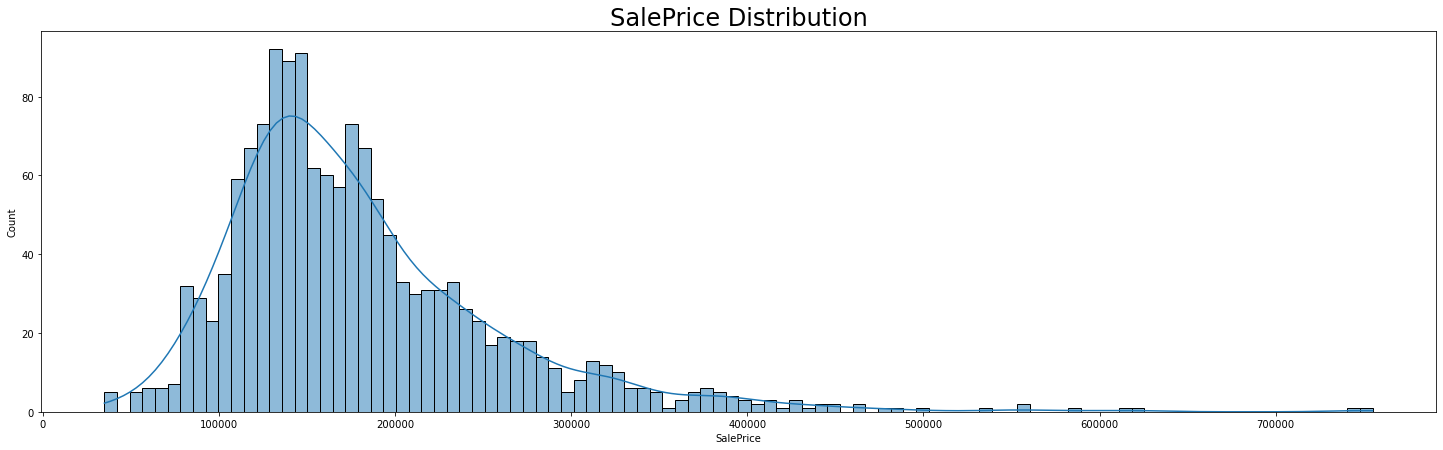

In [9]:
fig = plt.figure(figsize=(25,7))
sns.histplot(data = housingData,x="SalePrice", kde=True, bins=100, palette="Set2", multiple="stack").set_title('SalePrice Distribution', fontdict= {'fontsize': 24});

### Adjust for inflation using CPI

- Use YrSold and SalePrice to adjust the dollar to current date.

In [10]:
housingData['ADJUSTED_SalesPrice'] = housingData.apply(lambda x: cpi.inflate(x.SalePrice, x.YrSold), axis=1)

### Find missing Data

- 19 columns have missing data
- Alley, PoolQC, Fence and MiscFeature have more than 70% missing values so we decided to drop these fields.

In [11]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

In [12]:
miss_df = find_missing_percent(housingData)
'''Displays columns with missing values'''
display(miss_df[miss_df['PercentMissing']>0.0])
print("\n")

print("Number of columns with missing values:"+(str(miss_df[miss_df['PercentMissing']>0.0].shape[0])))

,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
6,Alley,1369.0,93.77
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07




Number of columns with missing values:19


In [13]:
drop_cols = miss_df[miss_df['PercentMissing'] >70.0].ColumnName.tolist()

print("Number of columns with more than 70%:"+ str(len(drop_cols)))
housingData = housingData.drop(drop_cols,axis=1)
#test = test.drop(drop_cols,axis =1)

miss_df = miss_df[miss_df['ColumnName'].isin(housingData.columns)]
'''Columns to Impute'''
impute_cols = miss_df[miss_df['TotalMissingVals']>0.0].ColumnName.tolist()
miss_df[miss_df['TotalMissingVals']>0.0]

Number of columns with more than 70%:4


,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07
57,FireplaceQu,690.0,47.26


### Basic Stats

- Oldest house was built in the year 1872 while the newest house in 2010.

In [14]:
housingData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.25000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.00000,190.000000
LotFrontage,1201.0,70.049958,24.284752,21.000000,59.000000,69.000000,80.00000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.50000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.00000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.00000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.00000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.00000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.000000,0.000000,0.000000,166.00000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.25000,5644.000000


#### Following were the observations for LotArea and checking for Distribution and Box plot for outliers:
* Run a HISTOGRAM on LotArea as that is typically the most import for a price! Run for where value is not null
* Histogram to see the frequency ranges and it shows 500 sq as most common
* Run a Distribution plot to validate the same
* Run a BOX PLOT which is very important to check for OUTLIERS

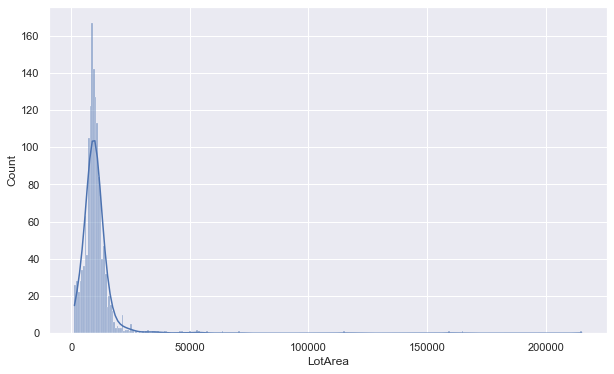

In [15]:
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(housingData['LotArea'], kde=True)
plt.show()

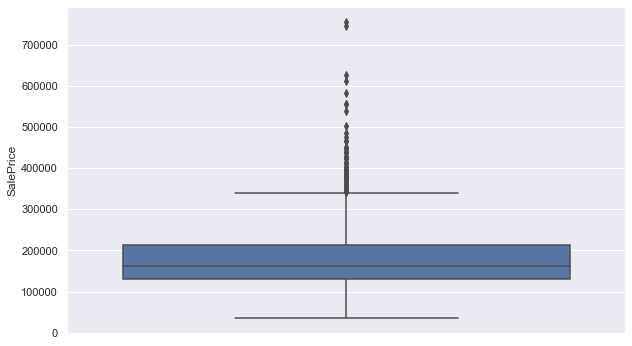

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(y='SalePrice',data=housingData)
plt.show()

### Removing Outlier

In order to avoid outliers, LotArea greater than 50,000 sq.ft. were eliminated 

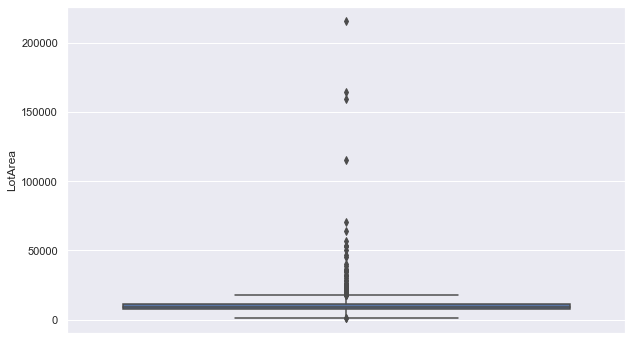

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(y='LotArea',data=housingData)
plt.show()

Text(0, 0.5, 'SalePrice')

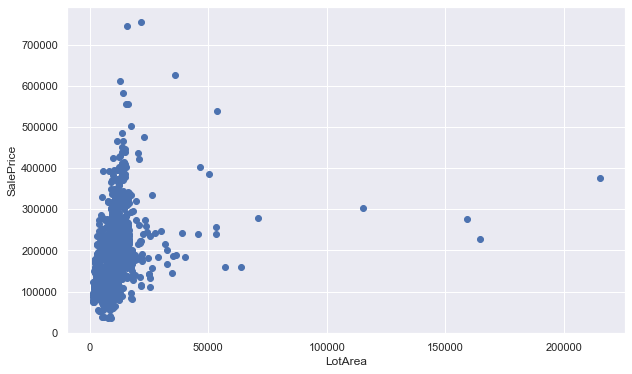

In [18]:
# Analysing the LotArea Feature against SalePrice
plt.figure(figsize=(10,6))
plt.scatter(housingData.LotArea, housingData.SalePrice)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
# it shows outliers in it

In [19]:
# Dropping lotArea greater than 50000 to remove outlier 
housingData = housingData[housingData.LotArea <= 50000].copy()
housingData.shape

(1449, 78)

Text(0, 0.5, 'SalePrice')

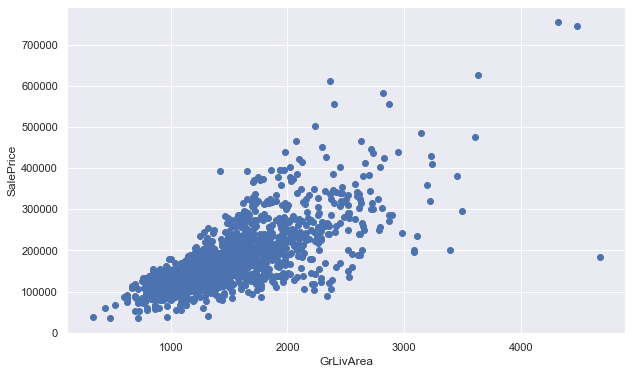

In [20]:
# Observing the Column output GrLivArea against Output SalePrice
# To check for outliers
plt.figure(figsize=(10,6))
plt.scatter(housingData.GrLivArea, housingData.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### Attribute Correlation Metrics

- 

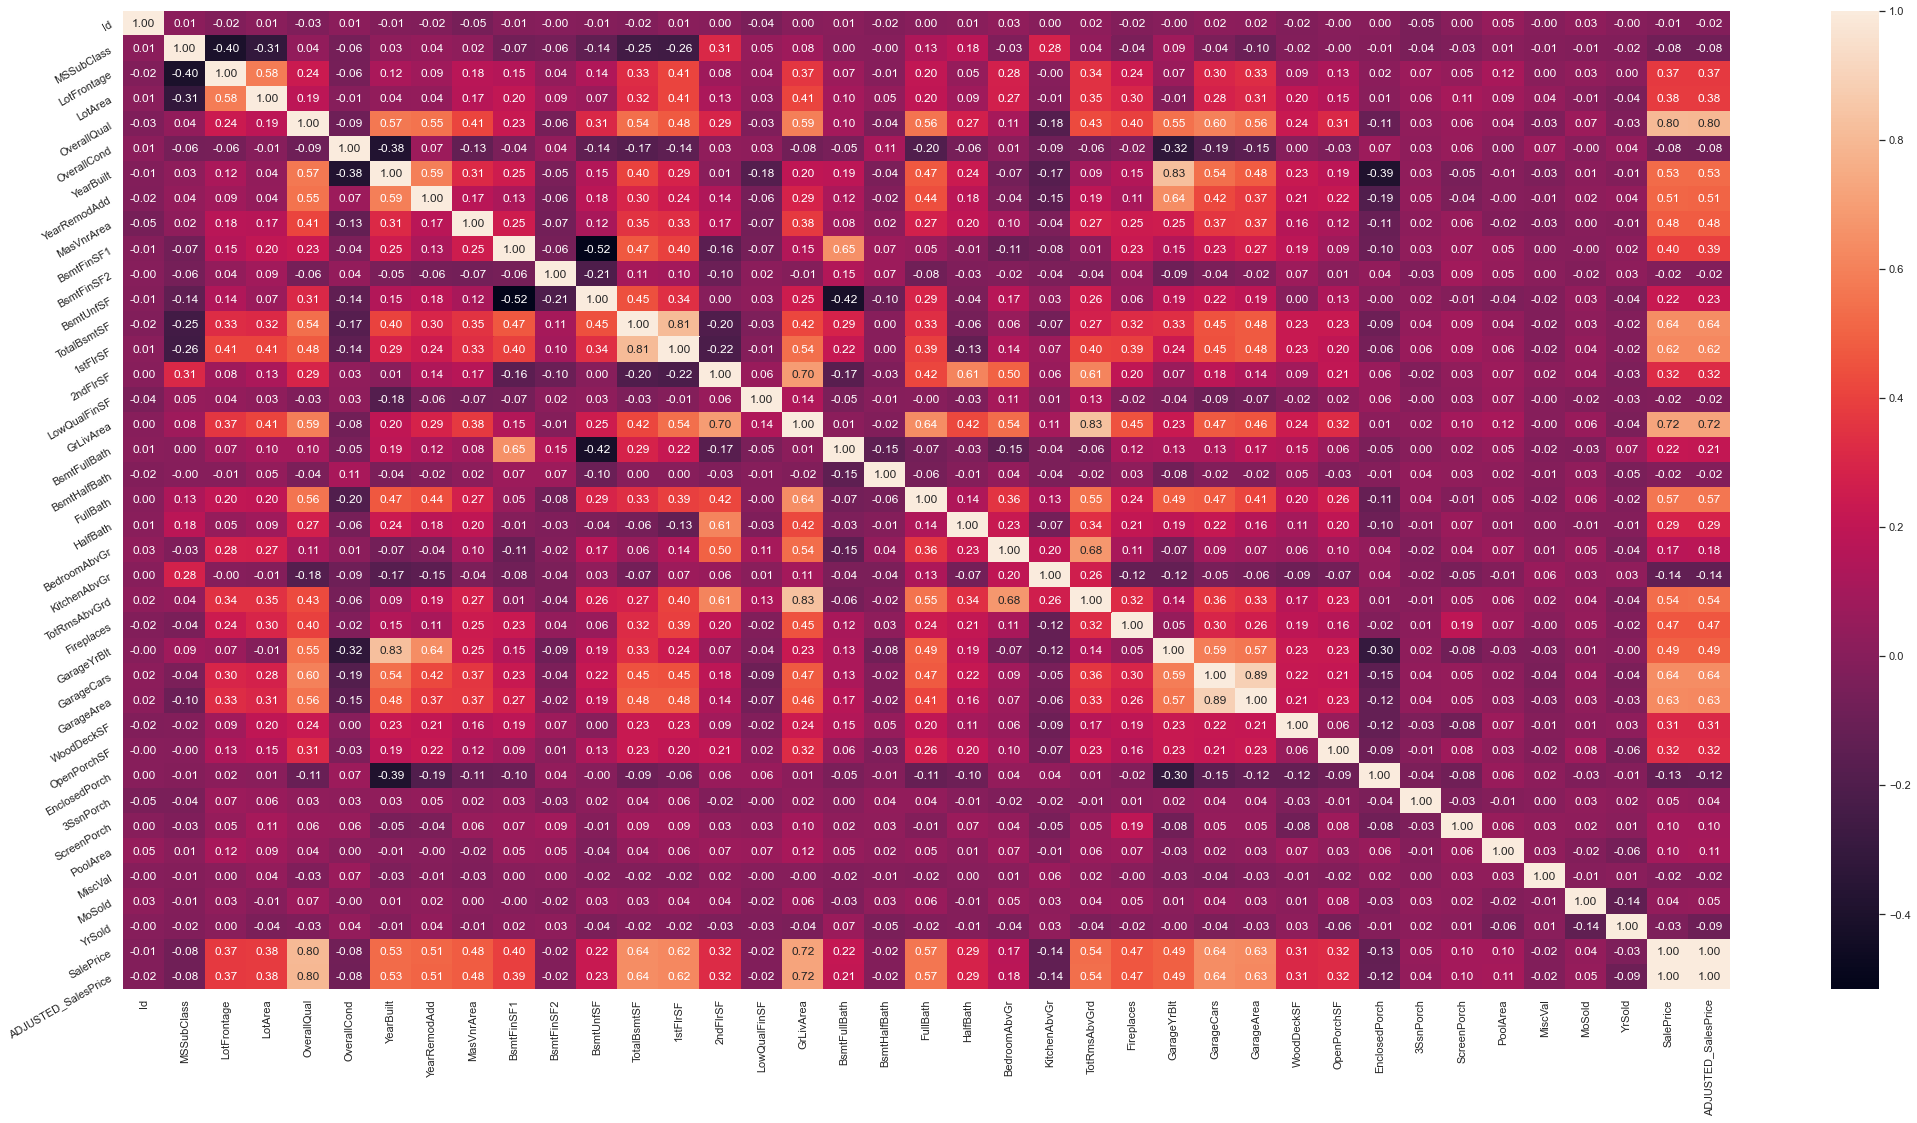

In [21]:
corr = housingData.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(36,18))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [22]:
number_of_price_groups = 5
number_of_values_per_group = len(housingData)/number_of_price_groups

visual_df = housingData.copy()
visual_df.sort_values(by=['SalePrice'], inplace=True, ignore_index=True)

# get group ranges (we want the same amount of members in each group)
last_boundary = 0
bounder_dict={}
for i in range(number_of_price_groups):
    boundary = visual_df.iloc[int((i+1)*number_of_values_per_group) - 1]["SalePrice"]
    bounder_dict[f"{last_boundary}-{boundary}"] = [last_boundary, boundary]
    last_boundary = boundary

def get_price_group(price, bounder_dict):
    group_lable = "-"
    for group in bounder_dict.keys():
        if bounder_dict[group][0] < price <= bounder_dict[group][1]:
            group_lable=group
    return group_lable
    
visual_df["PriceGroup"]=visual_df["SalePrice"].map(lambda x: get_price_group(x, bounder_dict));

In [23]:
# let's check:
indexs =[]
for group in visual_df["PriceGroup"].unique():
    indexs.append(visual_df[["SalePrice", "PriceGroup"]][visual_df["PriceGroup"]==group].head(1).index[0])
visual_df.loc[indexs][["SalePrice", "PriceGroup"]]

,SalePrice,PriceGroup
0,34900,0-123600
289,124000,123600-146500
579,146800,146500-178900
869,179000,178900-229000
1159,229456,229000-755000


- For visualization, it will be good to group the prices onto manageable levels.
- The above groups look good

In [24]:
date_features = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
info_df.loc[date_features]

,d_type,discret,percentage_of_missing_values,single_value_weight,min,max,mean,median,info_str
YearBuilt,int64,False,0.00,0.00,1872.0,2010.0,1971.27,1973.0,
YearRemodAdd,int64,False,0.00,0.00,1950.0,2010.0,1984.87,1994.0,
GarageYrBlt,float64,False,0.06,0.00,1900.0,2010.0,1978.51,1980.0,
MoSold,int64,True,0.00,0.17,0.0,0.0,0.00,0.0,"[253 X 6, 234 X 7, 204 X 5, 141 X 4, 122 X 8, ..."
YrSold,int64,True,0.00,0.23,0.0,0.0,0.00,0.0,"[338 X 2009, 329 X 2007, 314 X 2006, 304 X 200..."


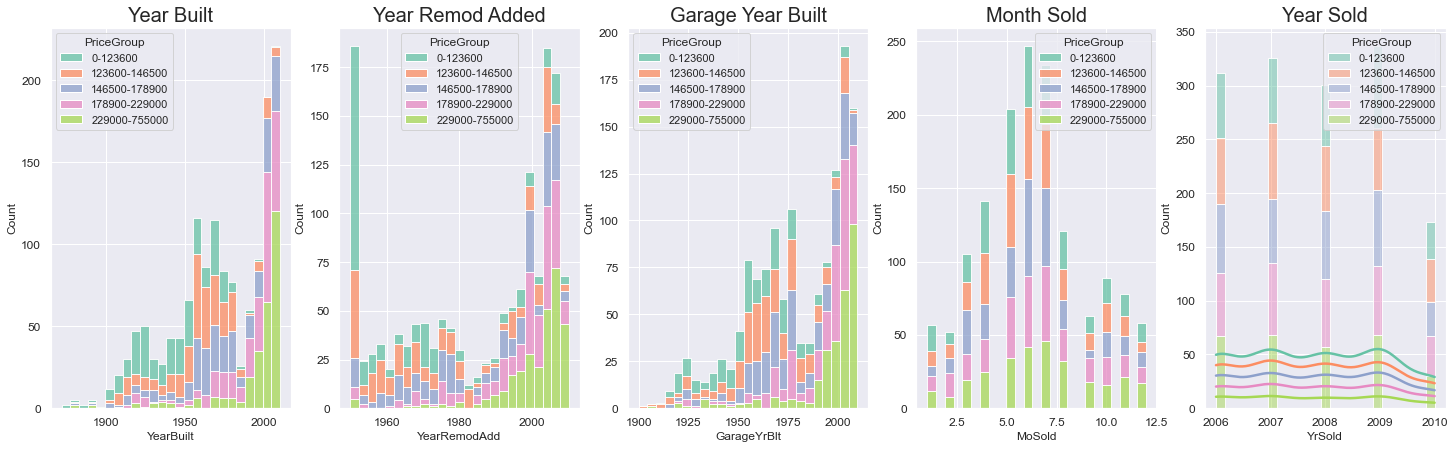

In [25]:
# build figure
fig = plt.figure(figsize=(25,7))

# add grid to figure
gs = fig.add_gridspec(1,5)

# fill grid with subplots
ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])
ax03 = fig.add_subplot(gs[0,3])
ax04 = fig.add_subplot(gs[0,4])


# adjust subheadline fontsize
ax00.set_title('Year Built', fontsize=20)
ax01.set_title('Year Remod Added', fontsize=20)
ax02.set_title('Garage Year Built', fontsize=20)
ax03.set_title('Month Sold', fontsize=20)
ax04.set_title('Year Sold', fontsize=20)

# adjust lable fontsize
ax00.tick_params(labelsize=12)
ax01.tick_params(labelsize=12)
ax02.tick_params(labelsize=12)
ax03.tick_params(labelsize=12)
ax04.tick_params(labelsize=12)

# plot (ax=axxx is important)
sns.histplot(data = visual_df,x="YearBuilt", kde=False, ax=ax00, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="YearRemodAdd", kde=False, ax=ax01, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="GarageYrBlt", kde=False, ax=ax02, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="MoSold", kde=False, ax=ax03, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="YrSold", kde=True, ax=ax04, bins=25, palette="Set2", multiple="stack", hue="PriceGroup");

### Skewness Levels on numerical Features

- Applying skewness, we find that the below fields are highly skewed.

In [26]:
# Checking skewness level on numerical features to remove
skewed_feats = housingData[num].apply(lambda x: skew(x.dropna())).\
sort_values(ascending=False)
skewness = pd.DataFrame({"Skewness ": skewed_feats})
skewness

,Skewness
MiscVal,24.427220
PoolArea,15.882700
3SsnPorch,10.253854
LowQualFinSF,8.966866
KitchenAbvGr,4.464409
BsmtFinSF2,4.284977
ScreenPorch,4.129883
BsmtHalfBath,4.113098
EnclosedPorch,3.073602
MasVnrArea,2.693526


- We will not remove outliers from every feature as it may affect the model since test set will have outliers too and our model needs to be robust against them

### Adding new feature

In [27]:
# Adding one extra feature -> total sqfootage feature 
housingData['TotalSF'] = housingData['TotalBsmtSF'] + housingData['1stFlrSF'] + housingData['2ndFlrSF']

In [28]:
X=housingData[['LotArea','BldgType','GarageCars','YearBuilt','FullBath','HalfBath','BedroomAbvGr','TotalSF']].copy()
Y=housingData[['ADJUSTED_SalesPrice']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1449 non-null   int64 
 1   BldgType      1449 non-null   object
 2   GarageCars    1449 non-null   int64 
 3   YearBuilt     1449 non-null   int64 
 4   FullBath      1449 non-null   int64 
 5   HalfBath      1449 non-null   int64 
 6   BedroomAbvGr  1449 non-null   int64 
 7   TotalSF       1449 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 101.9+ KB


array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'TotalSF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

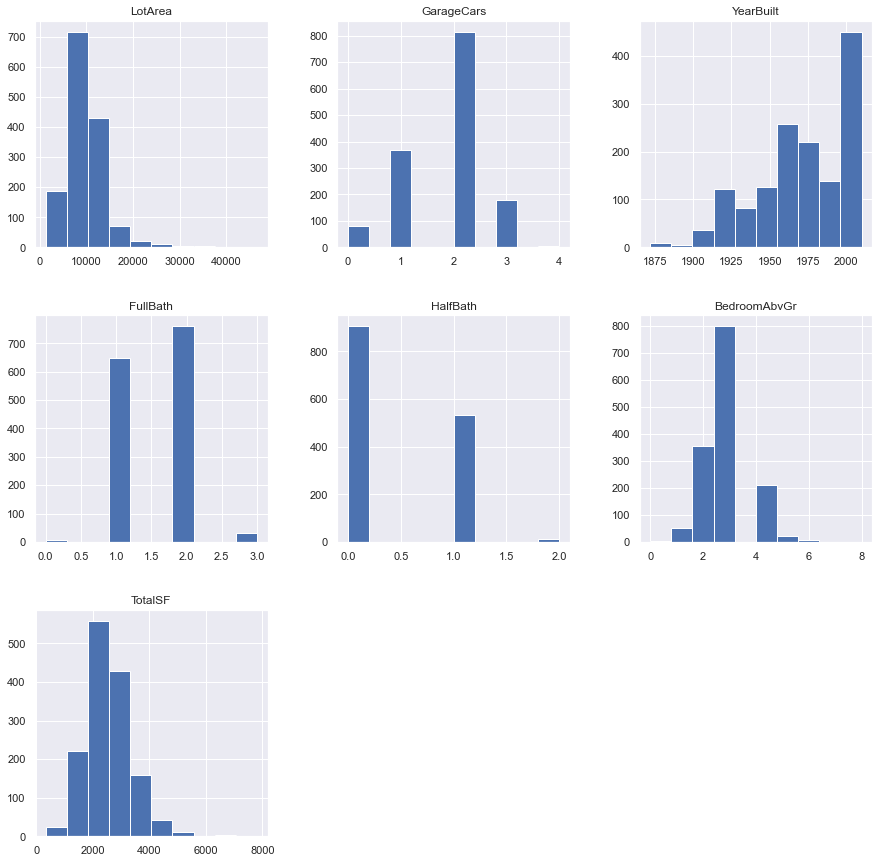

In [29]:
X.hist(figsize=(15,15))

array([[<AxesSubplot:title={'center':'ADJUSTED_SalesPrice'}>]],
      dtype=object)

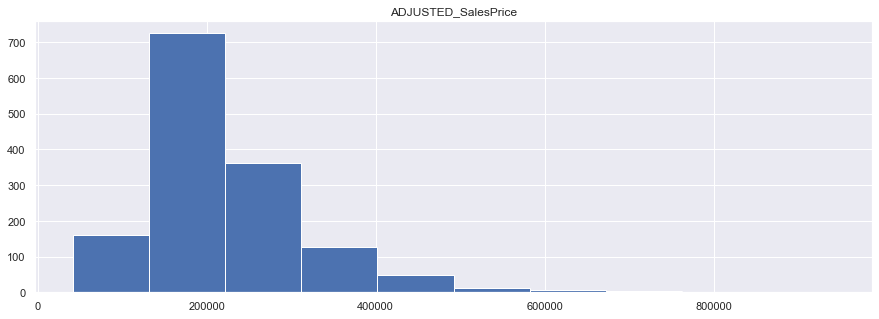

In [30]:
Y.hist(figsize=(15,5))

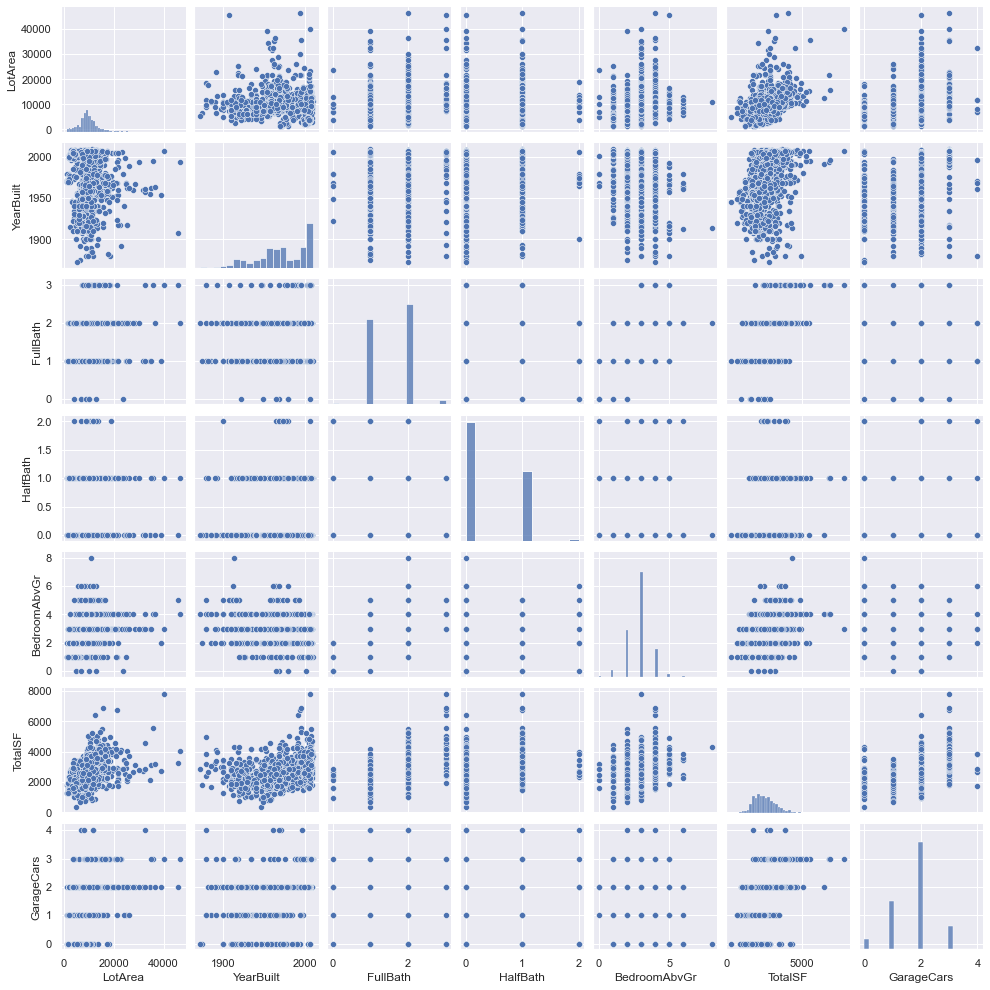

In [31]:
sns.pairplot(X[['LotArea', 'YearBuilt', 'FullBath', 'HalfBath','BedroomAbvGr','TotalSF','GarageCars']], height=2)

### Split the data into train and test

In [32]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1159, 8)
(290, 8)
(1159, 1)
(290, 1)


In [33]:
num_features =['LotArea', 'YearBuilt', 'FullBath', 'HalfBath','BedroomAbvGr','TotalSF','GarageCars']
cat_features = ['BldgType']

## Data pre-processing
We will build a pipeline to do some of the following tasks:

- Missing data
- Feature scaling (important for certain model such as Gradient Descent based models)
- Categorical feature encoding
- Outlier removal
- Transformation
- Custom processing

In [34]:
# any missing values?
X_train.isnull().sum()

LotArea         0
BldgType        0
GarageCars      0
YearBuilt       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotalSF         0
dtype: int64

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# Create the preprocessing pipeline for numerical features
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),
        ('scaler', StandardScaler())
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: one hot encoding

cat_pipeline = Pipeline(
    steps=[
                ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

## Model traning, tuning, evaluation and selection

- Next, we attach three different models (SVR, Ridge, XGBoost) to the same pre-processing pipeline and tune the some parameters using GridSearch with cross validation. Then, we compare their RMSE and choose the best model to proceed. 

### Using Support Vector Regression Model

In [131]:
# we show how to use GridSearch with K-fold cross validation (K=5) to fine tune the model
# we use the neg_root_mean_squared_error as the scoring metric

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


pipeline_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf_svr', SVR()),
])

parameters_svr=[
    {
        'clf_svr__kernel': ['linear','rbf','poly','sigmoid']#,'precomputed'
 
    }
]  

grid_search_svr = GridSearchCV(pipeline_svr,parameters_svr, cv=5,scoring='neg_root_mean_squared_error')

In [142]:
grid_search_svr.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'YearBuilt',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                    

In [143]:
# check the best performing parameter combination
grid_search_svr.best_params_

{'clf_svr__kernel': 'linear'}

In [128]:
# build-in CV results keys
sorted(grid_search_svr.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_svr__kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [144]:
# best linear regression model test score
grid_search_svr.best_score_

-100085.7038582825

- <b> Best Score (RMSE) </b> using <b> Support Vector regression </b> is -100085.7038582825

### Using Ridge Regression Model

In [132]:
from sklearn.linear_model import Ridge

# rf pipeline
pipeline_rg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf_RG', Ridge()),
])

parameters_rg=[
    {
        'clf_RG__alpha': [0,0.2,0.01,1.0],
        'clf_RG__copy_X': [True, False],
        'clf_RG__fit_intercept': [True, False]
    }
]                 

grid_search_rg = GridSearchCV(pipeline_rg,parameters_rg, cv=5, scoring='neg_root_mean_squared_error')

In [133]:
grid_search_rg.fit(X_train, y_train)

D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.99231e-18): result may not be accurate.
  overwrite_a=True).T
D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.37772e-17): result may not be accurate.
  overwrite_a=True).T
D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.99231e-18): result may not be accurate.
  overwrite_a=True).T
D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.37772e-17): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'YearBuilt',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                    

In [134]:
# best linear ridge regressor model test score
grid_search_rg.best_score_

-49146.2619536027

- <b> Best Score (RMSE) </b> using <b> Ridge regression  model </b> is -49146.2619536027

### Using XGBoost Regressor Model

In [135]:
# XGBoost pipeline
pipeline_xg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf_XG', xgb.XGBRegressor()),
])

parameters_xg=[
    {
        'clf_XG__max_depth': [5,10,15,20,25,30],
        'clf_XG__learning_rate': [0.001,0.01,0.1,0.5],
        'clf_XG__n_estimators': [100,150,200,250,300]

    }
]                 

grid_search_xg = GridSearchCV(pipeline_xg,parameters_xg, cv=5,scoring='neg_root_mean_squared_error')

In [136]:
grid_search_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'YearBuilt',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                    

In [137]:
grid_search_xg.best_score_

-44868.30845180691

- <b> Best Score (RMSE) </b> using <b> XGBoost Regression  model </b> is -44868.30845180691

### Comparing Best Score (RMSE) among <b>Support Vector Regression</b> , <b>Ridge Regression</b> and <b> XGBoost Regressor </b>

In [151]:
# best test score
print('best Support Vector regression score (RMSE) is: ', grid_search_svr.best_score_)
print('best Ridge regression score (RMSE) is: ', grid_search_rg.best_score_)
print('best XGBoost score (RMSE) is: ', grid_search_xg.best_score_)

best Support Vector regression score (RMSE) is:  -100085.7038582825
best Ridge regression score (RMSE) is:  -49146.2619536027
best XGBoost score (RMSE) is:  -44868.30845180691


- Among Support Vector Regression, Ridge REgression and XGBoost Regressor models, XGBoost Regressor has the least RMSE error. Hence, XGBoost Regressor is selected.

In [150]:
# best parameters for all three are:
print('best parameter for Support Vector regression are: ', grid_search_svr.best_params_)
print('best Ridge regression regression are: ', grid_search_rg.best_params_)
print('best XGBoost regression are: ', grid_search_xg.best_params_)

best parameter for Support Vector regression are:  {'clf_svr__kernel': 'linear'}
best Ridge regression regression are:  {'clf_RG__alpha': 0.2, 'clf_RG__copy_X': True, 'clf_RG__fit_intercept': False}
best XGBoost regression are:  {'clf_XG__learning_rate': 0.1, 'clf_XG__max_depth': 5, 'clf_XG__n_estimators': 100}


- XGBoost Regresson with learning rate= 0.1, Maximum depth of 5 and 100 estimators will yeild best score (RMSE).

### Baseline Prediction

In [190]:
y_baseline_value=y_test['ADJUSTED_SalesPrice'].mean()
y_baseline_pred=[y_baseline_value]*len(y_test)

In [191]:
#===========   RMSE and other metrics ===================
r_square_baseline= metrics.r2_score(y_test, y_baseline_pred)
mae_y_baseline = metrics.mean_absolute_error(y_test, y_baseline_pred)
mse_y_baseline = metrics.mean_squared_error(y_test, y_baseline_pred)
rmse_y_baseline = np.sqrt(metrics.mean_squared_error(y_test, y_baseline_pred))

print("Baseline Prediction \nr_square={0} \nmean_absolute_error={1}\nmean_square_error={2}\nsqrt_mean_square_error={3}".format(r_square_baseline,mae_y_baseline,mse_y_baseline,rmse_y_baseline))

Baseline Prediction 
r_square=0.0 
mean_absolute_error=63001.37238631565
mean_square_error=7761052223.808897
sqrt_mean_square_error=88096.83435747788


### Select the Best Model, which is <b>XGBoost Regressor</b> in this case, and run compute the RMSE

In [49]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_xg.best_estimator_

In [51]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)


In [192]:
#===========   RMSE and other metrics ===================
r_square= metrics.r2_score(y_test, y_pred)
mae_y = metrics.mean_absolute_error(y_test, y_pred)
mse_y = metrics.mean_squared_error(y_test, y_pred)
rmse_y = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("XGBoost Prediction\nr_square={0}\nmean_absolute_error={1}\nmean_square_error={2}\nsqrt_mean_square_error={3}".format(r_square,mae_y,mse_y,rmse_y))

XGBoost Prediction
r_square=0.8396199878447974
mean_absolute_error=22590.187043391896
mean_square_error=1244717649.991633
sqrt_mean_square_error=35280.55625966848


### Observation
- Our model is better than the baseline model (RMSE=88096.83435747788 for baseline vs RMSE=35280.55625966848 for XG Boost)
- Train RMSE of XG Boost Regressor is 44868.30845180691
- Test RMSE of our best estimator, which is XGBoost Regressor, is 35280.55625966848.
- In this case, accuracy in **test dataset was observed higher than in train dataset**


## Feature Importance

Given that we are using pipeline and one-hot encoding, the feature importance scores are not very straightforward to get. The following code shows how to get the feature importance scores from the XG Boost Regressor and create a plot.

In [53]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  ['LotArea', 'YearBuilt', 'FullBath',
                                   'HalfBath', 'BedroomAbvGr', 'TotalSF',
                                   'GarageCars']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['BldgType'])]),
 'clf_XG': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_ste

In [54]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['LotArea', 'YearBuilt', 'FullBath',
                                  'HalfBath', 'BedroomAbvGr', 'TotalSF',
                                  'GarageCars']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BldgType'])])

In [55]:
i = clf_best.named_steps['clf_XG'].feature_importances_
i

array([0.01635961, 0.07381907, 0.02667094, 0.02828762, 0.01716838,
       0.4238823 , 0.25741047, 0.03396913, 0.00581329, 0.08678783,
       0.00667852, 0.0231528 ], dtype=float32)

In [56]:
clf_best['preprocessor'].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['LotArea',
   'YearBuilt',
   'FullBath',
   'HalfBath',
   'BedroomAbvGr',
   'TotalSF',
   'GarageCars']),
 ('cat_pipeline',
  Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  ['BldgType'])]

In [57]:
# get columnTransformer
clf_best[0] 

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['LotArea', 'YearBuilt', 'FullBath',
                                  'HalfBath', 'BedroomAbvGr', 'TotalSF',
                                  'GarageCars']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BldgType'])])

In [58]:
clf_best[0].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['LotArea',
   'YearBuilt',
   'FullBath',
   'HalfBath',
   'BedroomAbvGr',
   'TotalSF',
   'GarageCars']),
 ('cat_pipeline',
  Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  ['BldgType'])]

In [59]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['LotArea',
 'YearBuilt',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotalSF',
 'GarageCars']

In [60]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['BldgType']

In [61]:
cat_new_feature_names = list(clf_best[0].transformers_[1][1]['onehot'].get_feature_names(cat_original_feature_names))
cat_new_feature_names

['BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE']

In [62]:
feature_names = num_original_feature_names + cat_new_feature_names
feature_names

['LotArea',
 'YearBuilt',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotalSF',
 'GarageCars',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE']

In [63]:
r = pd.DataFrame(i, index=feature_names, columns=['importance'])
r

,importance
LotArea,0.016360
YearBuilt,0.073819
FullBath,0.026671
HalfBath,0.028288
BedroomAbvGr,0.017168
TotalSF,0.423882
GarageCars,0.257410
BldgType_1Fam,0.033969
BldgType_2fmCon,0.005813
BldgType_Duplex,0.086788


In [64]:
r.sort_values('importance', ascending=False)

,importance
TotalSF,0.423882
GarageCars,0.257410
BldgType_Duplex,0.086788
YearBuilt,0.073819
BldgType_1Fam,0.033969
HalfBath,0.028288
FullBath,0.026671
BldgType_TwnhsE,0.023153
BedroomAbvGr,0.017168
LotArea,0.016360


<AxesSubplot:>

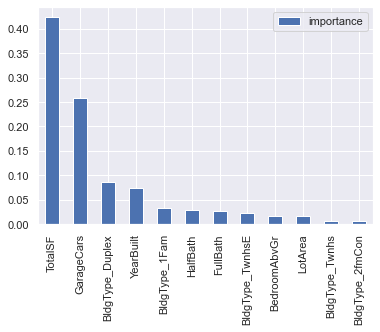

In [65]:
r.sort_values('importance', ascending=False).plot.bar()

## Remove unimportant Features

- HouseStyle was removed from the list of features as it had very less importance.

In [153]:
# we remove unimportant features: House Style and see the model is affected
# result: no difference with less features!!

num_features =['LotArea', 'YearBuilt', 'FullBath', 'HalfBath','BedroomAbvGr','TotalSF']
cat_features = ['BldgType']

# you must update preprocess and pipeline after changing the feature list
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

pipeline_xg_updated = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf_XG', xgb.XGBRegressor()),
])

parameters_xg=[
    {
        'clf_XG__max_depth': [5,10,15,20,25,30],
        'clf_XG__learning_rate': [0.001,0.01,0.1,0.5],
        'clf_XG__n_estimators': [100,150,200,250,300]

    }
]                 

grid_search_xg_updated = GridSearchCV(pipeline_xg_updated,parameters_xg, cv=5,scoring='neg_root_mean_squared_error')

# train the model using the updated full pipeline
grid_search_xg_updated.fit(X_train, y_train)

print('best XG Boost score is: ', grid_search_xg.best_score_)
print('best XG Boost score after feature selection is: ', grid_search_xg_updated.best_score_)

best XG Boost score is:  -44868.30845180691
best XG Boost score after feature selection is:  -44868.30845180691


## Persists the model

In [67]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "Housing.pickle")

['Housing.pickle']

In [68]:
# Load the model from a pickle file
saved_xg_clf = joblib.load("Housing.pickle")
saved_xg_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'YearBuilt',
                                                   'FullBath', 'HalfBath',
                                                   'BedroomAbvGr', 'TotalSF',
                                                   'GarageCars']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                     

## Using Test Datasets for prediction

- Read the datasets into the data frame and pulled only the common features.
- Renamed the columns to match the column names in X, Y frame.
- Transformed the "None" values to 0 in Newark Dataset.
- Created a dictionary to map the values in Building Type to match with our training dataset and removed 'Farm', 'mobile' and 'Land' types.
- Changed the order of the columns to match with X frame as its important for scikit learn
- Used clf_best.predict to predict the values of houses for each city and compared it to the actual data.

#### Observations

- Below table lists down the performance metrics for each of the cities

![Permformance Data](Data/perfDataSnapshot.jpg)

### Newark, DE

In [69]:
X_test.head()

,LotArea,BldgType,GarageCars,YearBuilt,FullBath,HalfBath,BedroomAbvGr,TotalSF
545,13837,1Fam,3,1988,2,1,4,3387
762,8640,1Fam,2,2009,2,1,3,2303
49,7742,1Fam,1,1966,1,0,3,1910
1390,9100,1Fam,2,2000,2,0,3,3050
142,8520,1Fam,2,1952,2,0,4,2295


In [70]:
#Read Newark Dataset and fetch the columns which were identified as features

newark_df=pd.read_csv('Data/Delaware - Newark.csv')
newark_test_df=newark_df[['description/year_built','description/lot_sqft','description/sqft','description/baths_full',
                          'description/baths_half','description/type','description/beds','description/garage','description/sold_price','description/sold_date']].copy()

newark_test_df=newark_test_df.rename(columns={"description/year_built": "YearBuilt", "description/lot_sqft": "LotArea", "description/sqft":"TotalSF" , 
                                              "description/baths_full": "FullBath", "description/baths_half": "HalfBath", "description/type": "BldgType", "description/beds":"BedroomAbvGr", 
                               "description/garage": "GarageCars", "description/sold_price": "SalePrice", "description/sold_date":"YrSold" })

In [71]:
# Create a dictionary of Building Type to map the test dataset to training data set

BldgTypedi = {"single_family": "1Fam", "townhomes": "Twnhs", "duplex_triplex": "Duplex", "condos":"Twnhs", "multi_family":"2fmCon"}

In [72]:
# Map the building type using replace function

newark_test_df['BldgType'].replace(BldgTypedi, inplace=True)

In [73]:
newark_test_df.BldgType.value_counts()

1Fam      132
Twnhs      63
Duplex      3
land        2
Name: BldgType, dtype: int64

In [74]:
# land not part of training, so we removed it.

newark_test_df=newark_test_df[newark_test_df.BldgType!='land']

In [75]:
# Change the order of the test data frame to match with X data
newark_test_df = newark_test_df[['LotArea','BldgType','GarageCars','YearBuilt','FullBath','HalfBath','BedroomAbvGr','TotalSF','SalePrice', 'YrSold']]
newark_test_df.head()

,LotArea,BldgType,GarageCars,YearBuilt,FullBath,HalfBath,BedroomAbvGr,TotalSF,SalePrice,YrSold
0,7841,1Fam,1,1965,1,1,3,3001,310000,2021-06-25
1,1742,Twnhs,None,1993,1,1,2,2176,195900,2021-06-25
2,6534,1Fam,None,1988,2,None,3,1300,260000,2021-06-25
3,None,Twnhs,None,1969,1,None,2,1070,132000,2021-06-25
4,15246,1Fam,2,1992,2,2,3,3467,467500,2021-06-25


In [76]:
# Update all the values of 'None' to 0

newark_test_df.loc[newark_test_df['GarageCars'] == 'None', 'GarageCars'] = 0
newark_test_df.loc[newark_test_df['HalfBath'] == 'None', 'HalfBath'] = 0
newark_test_df.loc[newark_test_df['LotArea'] == 'None', 'LotArea'] = 0
newark_test_df.loc[newark_test_df['TotalSF'] == 'None', 'TotalSF'] = 0
newark_test_df.loc[newark_test_df['FullBath'] == 'None', 'FullBath'] = 0


### Bear, DE

In [77]:
#Read Bear Dataset and fetch the columns which were identified as features

bear_df=pd.read_csv('Data/Delaware - Bear.csv')
bear_test_df=bear_df[['description/year_built','description/lot_sqft','description/sqft','description/baths_full','description/baths_half',
                      'description/type','description/beds','description/garage','description/sold_price','description/sold_date']].copy()

#rename the columns to match the X, Y data

bear_test_df=bear_test_df.rename(columns={"description/year_built": "YearBuilt", "description/lot_sqft": "LotArea", "description/sqft":"TotalSF" , "description/baths_full": "FullBath", 
                               "description/baths_half": "HalfBath", "description/type": "BldgType", "description/beds":"BedroomAbvGr", 
                               "description/garage": "GarageCars", "description/sold_price": "SalePrice", "description/sold_date":"YrSold" })

In [78]:
# Map the building type using replace function
bear_test_df['BldgType'].replace(BldgTypedi, inplace=True)

bear_test_df.head()

,YearBuilt,LotArea,TotalSF,FullBath,HalfBath,BldgType,BedroomAbvGr,GarageCars,SalePrice,YrSold
0,2001.0,9583.0,4050.0,3.0,1.0,1Fam,4.0,2.0,510000,2021-06-25
1,1988.0,8276.0,2025.0,2.0,1.0,1Fam,4.0,1.0,365000,2021-06-23
2,2018.0,3049.0,2950.0,3.0,1.0,Twnhs,4.0,2.0,385000,2021-06-21
3,1973.0,27878.0,1975.0,2.0,1.0,1Fam,4.0,1.0,335000,2021-06-21
4,2002.0,3485.0,1850.0,2.0,2.0,Twnhs,3.0,1.0,350000,2021-06-21


In [79]:
bear_test_df.BldgType.value_counts()

1Fam      125
Twnhs      66
Duplex      5
mobile      3
land        1
Name: BldgType, dtype: int64

In [80]:
# Change the order of the test data frame to match with X data
bear_test_df = bear_test_df[['LotArea','BldgType','GarageCars','YearBuilt','FullBath','HalfBath','BedroomAbvGr','TotalSF','SalePrice', 'YrSold']]

In [81]:
# land and mobile not part of training, so we removed it.

bear_test_df=bear_test_df[bear_test_df.BldgType!='land']
bear_test_df=bear_test_df[bear_test_df.BldgType!='mobile']

### Wilmington, DE

In [82]:
#Read Wilmington Dataset and fetch the columns which were identified as features

wilmigton_df=pd.read_csv('Data/Delaware - Wilmington.csv')

wilmigton_test_df=wilmigton_df[['description/year_built','description/lot_sqft','description/sqft','description/baths_full','description/baths_half',
                                'description/type','description/beds','description/garage','description/sold_price','description/sold_date']].copy()

#rename the columns to match the X, Y data
wilmigton_test_df=wilmigton_test_df.rename(columns={"description/year_built": "YearBuilt", "description/lot_sqft": "LotArea", "description/sqft":"TotalSF" , "description/baths_full": "FullBath", 
                               "description/baths_half": "HalfBath", "description/type": "BldgType", "description/beds":"BedroomAbvGr", 
                               "description/garage": "GarageCars", "description/sold_price": "SalePrice", "description/sold_date":"YrSold" })

In [83]:
# Map the building type using replace function

wilmigton_test_df['BldgType'].replace(BldgTypedi, inplace=True)

wilmigton_test_df.head()

,YearBuilt,LotArea,TotalSF,FullBath,HalfBath,BldgType,BedroomAbvGr,GarageCars,SalePrice,YrSold
0,1935.0,9583.0,2025.0,2.0,NaN,1Fam,4,NaN,275000,2021-06-25
1,1968.0,NaN,NaN,2.0,NaN,Twnhs,2,NaN,155000,2021-06-25
2,1920.0,3920.0,2725.0,NaN,NaN,2fmCon,0,NaN,451000,2021-06-25
3,1959.0,10890.0,2186.0,2.0,NaN,1Fam,3,1.0,341000,2021-06-25
4,1958.0,8712.0,2553.0,2.0,1.0,1Fam,4,1.0,385000,2021-06-25


In [84]:
wilmigton_test_df.BldgType.value_counts()

1Fam      124
Twnhs      68
2fmCon      7
mobile      1
Name: BldgType, dtype: int64

In [85]:
# Change the order of the test data frame to match with X data
wilmigton_test_df = wilmigton_test_df[['LotArea','BldgType','GarageCars','YearBuilt','FullBath','HalfBath','BedroomAbvGr','TotalSF','SalePrice', 'YrSold']]

In [86]:
# Mobile not part of training, so we removed it.

wilmigton_test_df=wilmigton_test_df[wilmigton_test_df.BldgType!='mobile']

### Ames, IA

In [87]:
#Read Ames Dataset and fetch the columns which were identified as features

ames_df=pd.read_csv('Data/IA - Ames.csv')


ames_test_df=ames_df[['description/year_built','description/lot_sqft','description/sqft','description/baths_full','description/baths_half',
                      'description/type','description/beds','description/garage','description/sold_price','description/sold_date']].copy()

#rename the columns to match the X, Y data
ames_test_df=ames_test_df.rename(columns={"description/year_built": "YearBuilt", "description/lot_sqft": "LotArea", "description/sqft":"TotalSF" , "description/baths_full": "FullBath", 
                               "description/baths_half": "HalfBath", "description/type": "BldgType", "description/beds":"BedroomAbvGr", 
                               "description/garage": "GarageCars", "description/sold_price": "SalePrice", "description/sold_date":"YrSold" })

In [88]:
# Map the building type using replace function

ames_test_df['BldgType'].replace(BldgTypedi, inplace=True)

ames_test_df.head()

,YearBuilt,LotArea,TotalSF,FullBath,HalfBath,BldgType,BedroomAbvGr,GarageCars,SalePrice,YrSold
0,1914.0,6098.0,1747.0,1.0,NaN,1Fam,3.0,NaN,211000,2021-06-25
1,1998.0,9600.0,1539.0,2.0,1.0,1Fam,4.0,2.0,269900,2021-06-23
2,1994.0,8276.0,990.0,2.0,NaN,1Fam,3.0,2.0,206500,2021-06-23
3,2007.0,10411.0,1646.0,2.0,1.0,1Fam,4.0,2.0,345000,2021-06-21
4,2006.0,6240.0,1325.0,3.0,NaN,Twnhs,3.0,2.0,329900,2021-06-21


In [89]:
ames_test_df.BldgType.value_counts()

1Fam      157
Twnhs      26
2fmCon      7
land        7
farm        3
Name: BldgType, dtype: int64

In [90]:
# Change the order of the test data frame to match with X data
ames_test_df = ames_test_df[['LotArea','BldgType','GarageCars','YearBuilt','FullBath','HalfBath','BedroomAbvGr','TotalSF','SalePrice', 'YrSold']]

In [91]:
# Mobile, Land, Farm not part of training, so we removed it.

ames_test_df=ames_test_df[ames_test_df.BldgType!='mobile']
ames_test_df=ames_test_df[ames_test_df.BldgType!='land']
ames_test_df=ames_test_df[ames_test_df.BldgType!='farm']

### Model prediction using the test dataset

In [113]:
# Preparing the final dataset  by dropping the SalesPrice and Year Sold

newark_test_final=newark_test_df.drop(['SalePrice', 'YrSold'], axis=1)
bear_test_final=bear_test_df.drop(['SalePrice', 'YrSold'], axis=1)
ames_test_final=ames_test_df.drop(['SalePrice', 'YrSold'], axis=1)
wilmington_test_final=wilmigton_test_df.drop(['SalePrice', 'YrSold'], axis=1)

#------------------------------
#calculate the mean SalesPrice value as the base value
newark_mean_SalesPrice=newark_test_df['SalePrice'].mean(skipna=False)
bear_mean_SalesPrice=bear_test_df['SalePrice'].mean(skipna=False)
ames_mean_SalesPrice=ames_test_df['SalePrice'].mean(skipna=True)
wilmington_mean_SalesPrice=wilmigton_test_df['SalePrice'].mean(skipna=True)

In [93]:
# Creating y_test data frames to compare the predicted values and finding accuracy

y_newark_test=newark_test_df['SalePrice'].copy()
y_bear_test=bear_test_df['SalePrice'].copy()
y_ames_test=ames_test_df['SalePrice'].copy()
y_wilmington_test=wilmigton_test_df['SalePrice'].copy()

In [94]:
# Executing the model with the test data sets

y_newark_pred = clf_best.predict(newark_test_final)
y_bear_pred = clf_best.predict(bear_test_final)
y_ames_pred = clf_best.predict(ames_test_final)
y_wilmington_pred = clf_best.predict(wilmington_test_final)

In [117]:
#===========   R-square and other metrics ===================
r_square_newark= metrics.r2_score(y_newark_test, y_newark_pred)
mae_y_newark = metrics.mean_absolute_error(y_newark_test, y_newark_pred)
mse_y_newark = metrics.mean_squared_error(y_newark_test, y_newark_pred)
rmse_y_newark = np.sqrt(metrics.mean_squared_error(y_newark_test, y_newark_pred))

perfdata = []
perfdata.append(['Newark-DE', r_square_newark, mae_y_newark, mse_y_newark,rmse_y_newark, newark_mean_SalesPrice])
print('-------------------------Newark------------------------------')
print("XGBoost::r_square={0}::mean_absolute_error={1}::mean_square_error={2}::sqrt_mean_square_error={3}::".format(r_square_newark,mae_y_newark,mse_y_newark,rmse_y_newark))

#===========   R-square and other metrics ===================
r_square_bear= metrics.r2_score(y_bear_test, y_bear_pred)
mae_y_bear = metrics.mean_absolute_error(y_bear_test, y_bear_pred)
mse_y_bear = metrics.mean_squared_error(y_bear_test, y_bear_pred)
rmse_y_bear = np.sqrt(metrics.mean_squared_error(y_bear_test, y_bear_pred))

perfdata.append(['Bear-DE', r_square_bear, mae_y_bear, mse_y_bear,rmse_y_bear, bear_mean_SalesPrice])

print('\n-------------------------Bear------------------------------')
print("XGBoost::r_square={0}::mean_absolute_error={1}::mean_square_error={2}::sqrt_mean_square_error={3}::".format(r_square_bear,mae_y_bear,mse_y_bear,rmse_y_bear))

#===========   R-square and other metrics ===================
r_square_wilmington= metrics.r2_score(y_wilmington_test, y_wilmington_pred)
mae_y_wilmington = metrics.mean_absolute_error(y_wilmington_test, y_wilmington_pred)
mse_y_wilmington = metrics.mean_squared_error(y_wilmington_test, y_wilmington_pred)
rmse_y_wilmington = np.sqrt(metrics.mean_squared_error(y_wilmington_test, y_wilmington_pred))
perfdata.append(['Wilmington-DE', r_square_wilmington, mae_y_wilmington, mse_y_wilmington,rmse_y_wilmington,wilmington_mean_SalesPrice])

print('\n-------------------------Wilmington------------------------------')
print("XGBoost::r_square={0}::mean_absolute_error={1}::mean_square_error={2}::sqrt_mean_square_error={3}::".format(r_square_wilmington,mae_y_wilmington,mse_y_wilmington,rmse_y_wilmington))

#===========   R-square and other metrics ===================
r_square_ames= metrics.r2_score(y_ames_test, y_ames_pred)
mae_y_ames = metrics.mean_absolute_error(y_ames_test, y_ames_pred)
mse_y_ames = metrics.mean_squared_error(y_ames_test, y_ames_pred)
rmse_y_ames = np.sqrt(metrics.mean_squared_error(y_ames_test, y_ames_pred))
perfdata.append(['Ames-IA', r_square_ames, mae_y_ames, mse_y_ames,rmse_y_ames,ames_mean_SalesPrice ])

print('\n-------------------------Ames------------------------------')
print("XGBoost::r_square={0}::mean_absolute_error={1}::mean_square_error={2}::sqrt_mean_square_error={3}::".format(r_square_ames,mae_y_ames,mse_y_ames,rmse_y_ames))

-------------------------Newark------------------------------
XGBoost::r_square=-0.30653533595856053::mean_absolute_error=118402.9430239899::mean_square_error=18141222606.58218::sqrt_mean_square_error=134689.35595132297::

-------------------------Bear------------------------------
XGBoost::r_square=0.07002930419408915::mean_absolute_error=108738.83840880102::mean_square_error=15479422592.212631::sqrt_mean_square_error=124416.32767532014::

-------------------------Wilmington------------------------------
XGBoost::r_square=-0.06977474732716038::mean_absolute_error=159559.16955873117::mean_square_error=54283722124.90736::sqrt_mean_square_error=232988.67381249965::

-------------------------Ames------------------------------
XGBoost::r_square=-0.29812010850684456::mean_absolute_error=112514.73478618421::mean_square_error=19084950358.05947::sqrt_mean_square_error=138148.29118762008::


In [118]:
## Storing Performance Data to use in the streamlit app

perfdata_df = pd.DataFrame(perfdata, columns=['City', 'r_square', 'mean_absolute_error','mean_square_error','sqrt_mean_square_error','mean_SalesPrice'])

perfdata_df.to_csv(r'Data/perfData.csv',index = False, header=True)
perfdata_df

,City,r_square,mean_absolute_error,mean_square_error,sqrt_mean_square_error,mean_SalesPrice
0,Newark-DE,-0.306535,118402.943024,1.814122e+10,134689.355951,308017.207071
1,Bear-DE,0.070029,108738.838409,1.547942e+10,124416.327675,338265.816327
2,Wilmington-DE,-0.069775,159559.169559,5.428372e+10,232988.673812,328693.668342
3,Ames-IA,-0.298120,112514.734786,1.908495e+10,138148.291188,286503.689474
